In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Student_Performance.csv')

print(data.head())
print(data.info())
print(data.isnull().sum())
print(data.shape)
print(data.duplicated().sum())

data.drop_duplicates(inplace=True)

print(data.describe().T)

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

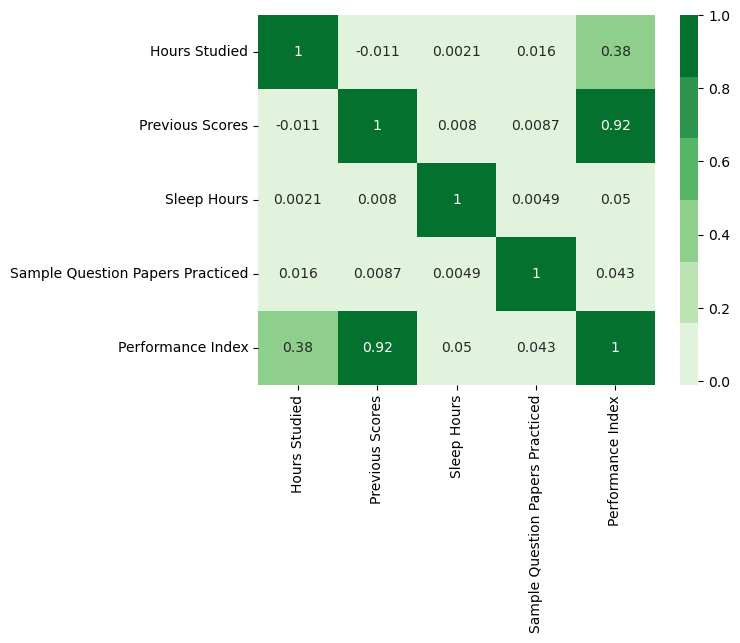

In [17]:
# Check correlation using a heatmap
sns.heatmap(data=data.select_dtypes(exclude="object").corr(), annot=True, cmap=sns.color_palette("Greens"))
plt.show()


In [19]:
# Prepare for training, testing split - all features in x, the predicted value in y
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# x will now contain Hours studied, Previous scored, Extracurricular activities, Sleep Hours
# y will contain the outcome (Performance Index)

print(x)
print(y)

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]
[91. 65. 45. ... 74. 95. 64.]


In [ ]:
# Do one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label = LabelEncoder()
x[:,2] = label.fit_transform(x[:,2])
print(x)

# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(y_train.shape)
print(y_test.shape)

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Print results
pred = model.predict(x_test)
print("Train score: {} \n Mean absolute error: {} \n r2_score: {}".format(mean_squared_error(y_test,pred), mean_absolute_error(y_test,pred), r2_score(y_test,pred)))

# Create a new DF containing actual performance inde value and predicted performance Index value for the test set                                                                                                                                                                                                                                   